In [1]:
import os
import matplotlib.pyplot as plt
from IPython import display

In [2]:
current_directory = os.getcwd()

In [3]:
os.chdir('images')

In [4]:
original_epi = display.Image(filename = 'EPIWeights.PNG')

In [5]:
images = {}
data_directory = os.getcwd()

for filename in os.listdir():
    if not '.PNG' in filename:
        folder_name = filename
        
        os.chdir(folder_name)
        images[folder_name] = {}
        
        for image_name in os.listdir():
            image = display.Image(filename = image_name)
            
            #image = plt.imread(image_name)
            images[folder_name][image_name] = image
            
        os.chdir(data_directory)
        
os.chdir(current_directory)

In [6]:
def images_with_string_in_name(string):
    for folder in list(images.keys()):
        for name, image in images[folder].items():
            if string in name:
                display.display(image)

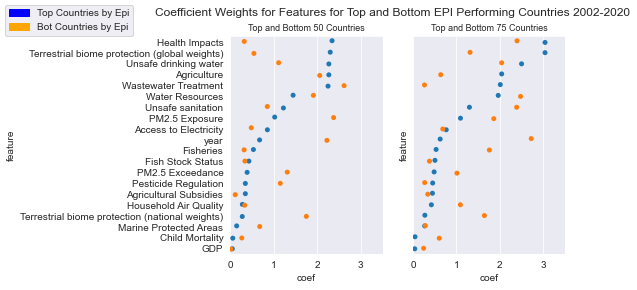

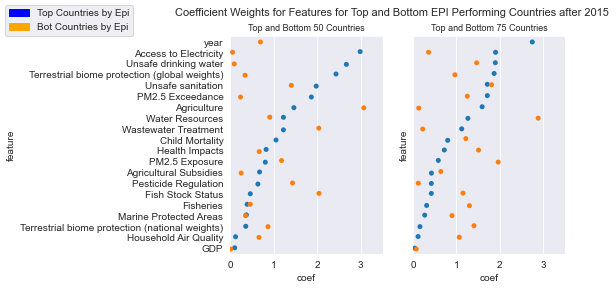

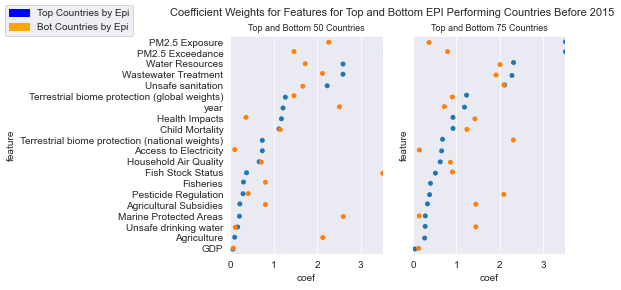

In [7]:
images_with_string_in_name('side')

***Extra Trees feature importance over time analysis***

In [8]:
list(images.keys())

['CountryCoefCatplots', 'ExtraTreesOverTime', 'RidgeLinearRegressionOverTime']

In [9]:
bars = []
for name, image in images['ExtraTreesOverTime'].items():
    if 'bar' in name:
        bars.append(image)

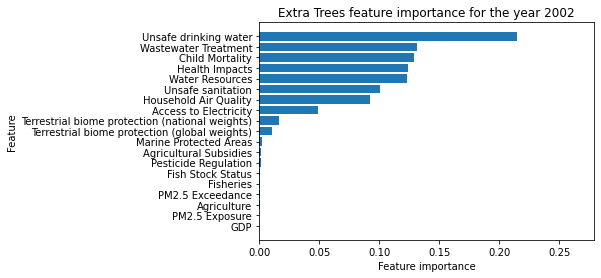

In [10]:
display.display(bars[0])

- For the first year in our dataset, we see four water and sanitation based features as high predictors for EPI, along with child mortality, health impacts, household air quality, and access to electricity. 

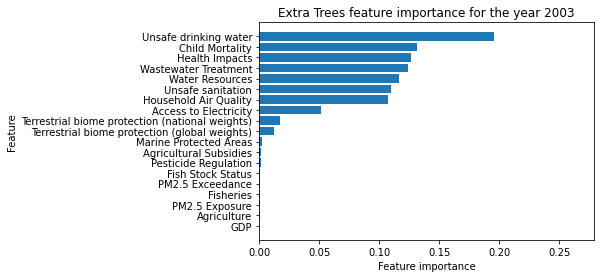

In [11]:
display.display(bars[1])

- The change from 2002 to 2003 is a minor shift among comparable feature importance values, not statistically interesting.

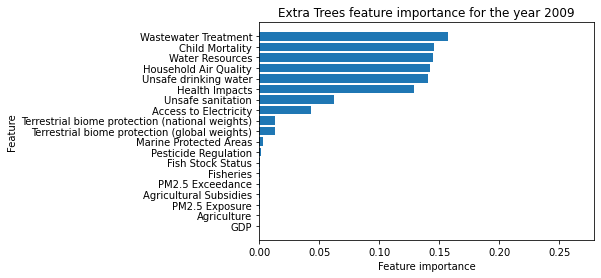

In [12]:
display.display(bars[7])

- The first year to display significant changes to model feature importances is 2009, where wastewater treatment's feature importance becomes more normalized compared to the other top features. This is around the period where more countries are providing data, which makes the lessening of single-feature importance make sense. 

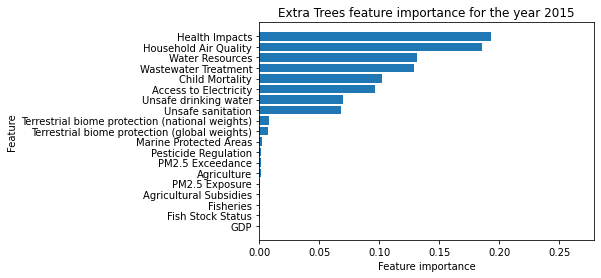

In [13]:
display.display(bars[13])

- The next large shift is in 2015, where Health Impacts and Household Air Quality make a drastic upward shift in importance. Child Mortality moves down, and Access to Electricity moves up to match it.

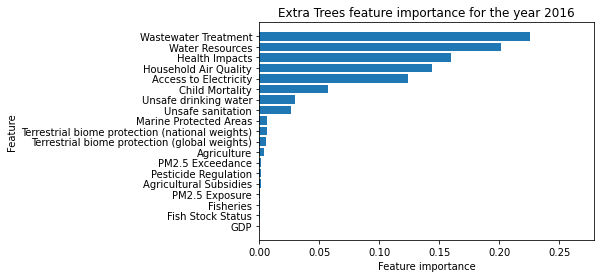

In [14]:
display.display(bars[14])

- 2016 is the beginning of high data volatility, as it is when a large number of features begin being more accurately reported by their respective countries. The EPI weighting was redefined this year. We see Marine Protected Areas and Agriculture both move from near-zero to slight importance, and a higher stratification among the original high importance features.

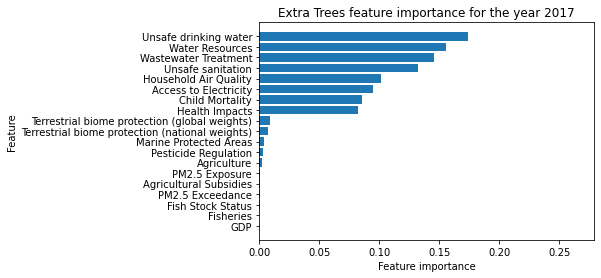

In [15]:
display.display(bars[15])

- 2017 shows a return to pre-2016 feature evalutations.

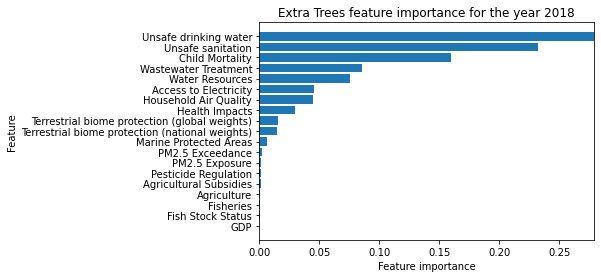

In [16]:
display.display(bars[16])

- 2018 has the largest feature importance of the entire dataset, high levels of stratification, and an elevation of Unsafe drinking water, Unsafe sanitation, and Child Mortality to higher than average levels. This does not coincide with any major water-related epidemics that I could locate in outside research.

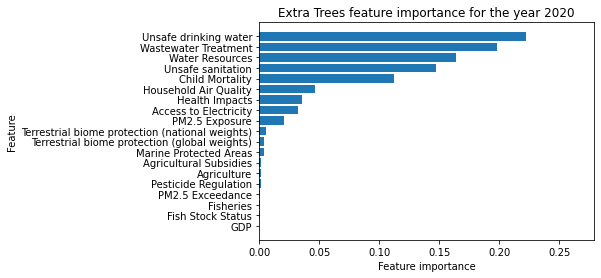

In [17]:
display.display(bars[18])

Our final plot shows the feature importances of the model with the best selection of data provided. 
- We see that of the original features of high importance from 2002 (below) Household Air Quality, Health Impacts, and Access to Electricity have all fallen far below their original levels. 
- Unsafe drinking water remains relatively constant and has maintained highest feature importance.  Child mortality remains fairly constant.
- Wastewater Treatment, Water Resources, and Unsafe sanitation all become more important features.
- PM2.5 Exposure gains relevance.

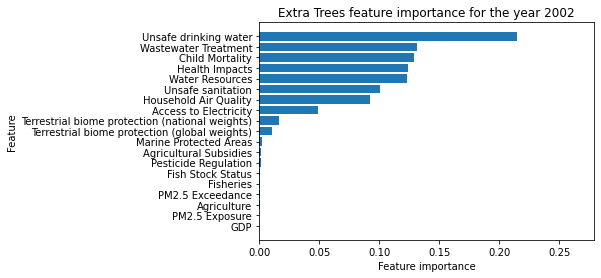

In [18]:
display.display(bars[0])

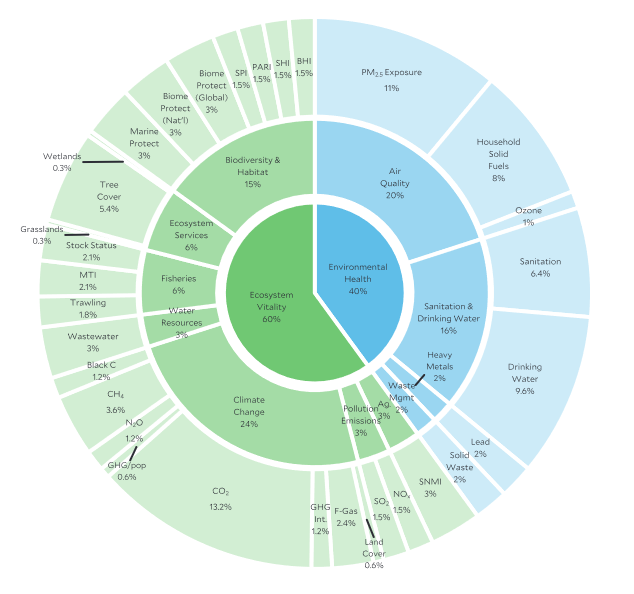

In [19]:
display.display(original_epi)

- Overall, the modeling of this dataset over time has shown us the constant importance of water and sanitation based metrics in predicting a country's EPI. 
- Drinking water is 9.6% of the 2020 EPI model, but is consistently higher than .2 in feature importance.
- Additionally, many metrics that are not used to calculate the 2020 EPI are accurate predictors of the EPI from 2002 to 2020, indicating that the methods used for calculating the EPI may not be accurately representing the data as a whole.

***Next section***